In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',50)

https://opendata-ajuntament.barcelona.cat/data/ca/dataset/accidents-vehicles-gu-bcn

In [7]:
acc_18=pd.read_csv('2018_accidents_vehicles_gu_bcn_.csv')
acc_18.head()

,Codi_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Descripcio_tipus_vehicle,Descripcio_model,Descripcio_marca,Descripcio_color,Descripcio_carnet,Antiguitat_carnet,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2018S007344,1,Ciutat Vella,1,el Raval,269108,Rambla ...,1,Diumenge,Dg,Laboral,2018,9,Setembre,30,0,Nit,No és causa del vianant,Turisme,CORDOBA,SEAT,Blanc,B,5,431228.30,4581110.84,2.176455,41.376735
1,2018S009617,1,Ciutat Vella,1,el Raval,701265,B-10 (Besòs) ...,K110,Dilluns,Dl,Laboral,2018,12,Desembre,17,0,Nit,No és causa del vianant,Turisme,206,PEUGEOT,Blau,B,1,431320.52,4580791.56,2.177594,41.373868
2,2018S008382,1,Ciutat Vella,2,el Barri Gòtic,34308,Ferran ...,2,Divendres,Dv,Laboral,2018,11,Novembre,2,0,Nit,No és causa del vianant,"Camió rígid > 3,5 tones",Desconegut,DAF-HERMANNS,Taronja,C,25,431052.34,4581514.69,2.174305,41.380358
3,2018S002684,1,Ciutat Vella,2,el Barri Gòtic,55909,Call ...,21,Dilluns,Dl,Laboral,2018,4,Abril,9,0,Nit,No és causa del vianant,"Camió rígid > 3,5 tones",ML140E24 E,IVECO FIAT,Blanc,C,11,431241.33,4581757.56,2.176538,41.382561
4,2018S004886,1,Ciutat Vella,2,el Barri Gòtic,82901,Colom ...,25,Dimarts,Dm,Laboral,2018,6,Juny,26,0,Nit,No és causa del vianant,Taxi,TOLEDO,SEAT,Negre/Groc,B,5,431390.44,4581135.49,2.178391,41.376971


In [6]:
acc_18.shape

(19079, 28)

In [8]:
acc_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19079 entries, 0 to 19078
Data columns (total 28 columns):
Codi_expedient              19079 non-null object
Codi_districte              19079 non-null int64
Nom_districte               19079 non-null object
Codi_barri                  19079 non-null int64
Nom_barri                   19079 non-null object
Codi_carrer                 19079 non-null int64
Nom_carrer                  19079 non-null object
Num_postal                  5144 non-null object
Descripcio_dia_setmana      19079 non-null object
Dia_setmana                 19079 non-null object
Descripcio_tipus_dia        19079 non-null object
Any                         19079 non-null int64
Mes_any                     19079 non-null int64
Nom_mes                     19079 non-null object
Dia_mes                     19079 non-null int64
Hora_dia                    19079 non-null int64
Descripcio_torn             19079 non-null object
Descripcio_causa_vianant    19079 non-null object

In [12]:
acc_18.Descripcio_tipus_vehicle.unique()

array(['Turisme', 'Camió rígid > 3,5 tones', 'Taxi', 'Ciclomotor',
       'Bicicleta', 'Motocicleta', 'Furgoneta', 'Autobús', 'Tot terreny',
       'Camió rígid <= 3,5 tones', 'Desconegut',
       'Altres vehicles amb motor', 'Quadricicle > 75 cc',
       'Veh. mobilitat personal amb motor',
       "Maquinària d'obres i serveis", 'Tractor camió', 'Autocar',
       'Autobús articulat', 'Tren o tramvia',
       'Altres vehicles sense motor', 'Microbús <= 17',
       'Veh. mobilitat personal sense motor', 'Autocaravana',
       'Quadricicle < 75 cc'], dtype=object)

In [13]:
acc_18.groupby(['Descripcio_tipus_vehicle']).Mes_any.count()

Descripcio_tipus_vehicle
Altres vehicles amb motor                28
Altres vehicles sense motor              10
Autobús                                 476
Autobús articulat                        58
Autocar                                  40
Autocaravana                              2
Bicicleta                               782
Camió rígid <= 3,5 tones                280
Camió rígid > 3,5 tones                 169
Ciclomotor                              891
Desconegut                               27
Furgoneta                              1248
Maquinària d'obres i serveis             14
Microbús <= 17                            6
Motocicleta                            6102
Quadricicle < 75 cc                       1
Quadricicle > 75 cc                       1
Taxi                                    993
Tot terreny                              33
Tractor camió                            54
Tren o tramvia                           17
Turisme                                7707
Veh. mo

In [16]:
bici18=acc_18[acc_18['Descripcio_tipus_vehicle']=='Bicicleta']
bici18.shape

(782, 28)

In [54]:
import folium
from folium.plugins import HeatMap,Fullscreen

#creo mapa de fondo - situado en Barcelona
barcelona_map = folium.Map(location=[41.38879, 2.15899], zoom_start=13)

#dataframe con lat y long
heat_df=bici18[['Latitud','Longitud']]

heat_data=[[row['Latitud'],row['Longitud']] for index,row in heat_df.iterrows() ]

#agrego el mapa de calor al mapa base
HeatMap(heat_data).add_to(barcelona_map)

#agrego funcionalidad para poder ponerlo en full screen
Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
).add_to(barcelona_map)

print('Mapa de Calor Accidentes de conductores de Bicicletas año 2018')

barcelona_map



Mapa de Calor Accidentes de conductores de Bicicletas año 2018


In [26]:
bici18['barri-carrer']=bici18.Nom_barri+'-'+bici18.Nom_carrer

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

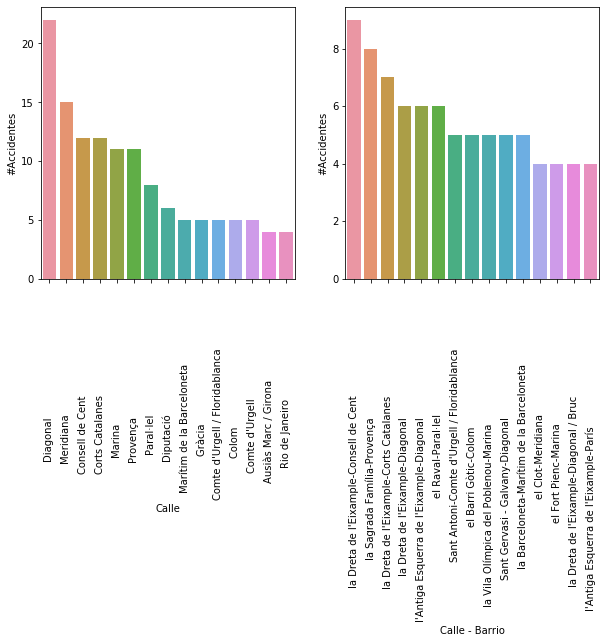

In [42]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
x=bici18.Nom_carrer.value_counts().head(15).index
y=bici18.Nom_carrer.value_counts().head(15)
ax=sns.barplot(x=x,y=y)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Calle')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
x=bici18['barri-carrer'].value_counts().head(15).index
y=bici18['barri-carrer'].value_counts().head(15)
ax=sns.barplot(x=x,y=y)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Calle - Barrio')
plt.xticks(rotation=90)



Text(0, 0.5, '# Accidents')

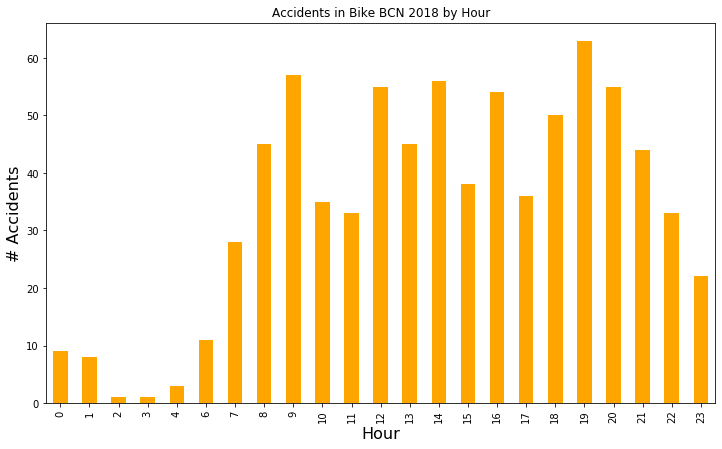

In [47]:
accidents_hour=bici18.Hora_dia.value_counts().sort_index()
accidents_hour.plot(kind='bar',figsize=(12,7),color='orange')

plt.title('Accidents in Bike BCN 2018 by Hour')
plt.xlabel('Hour',fontsize=16)
plt.ylabel('# Accidents',fontsize=16)

Text(0.5, 1.0, 'Accidents by Day of the week')

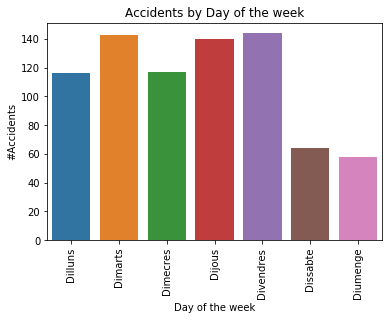

In [53]:
#Día de la semana
ax=sns.countplot('Descripcio_dia_setmana',data=bici18,order=['Dilluns', 'Dimarts', 'Dimecres', 'Dijous',
                                        'Divendres', 'Dissabte', 'Diumenge'])
ax.set_ylabel('#Accidents')
ax.set_xlabel('Day of the week')
plt.xticks(rotation=90)
plt.title('Accidents by Day of the week')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

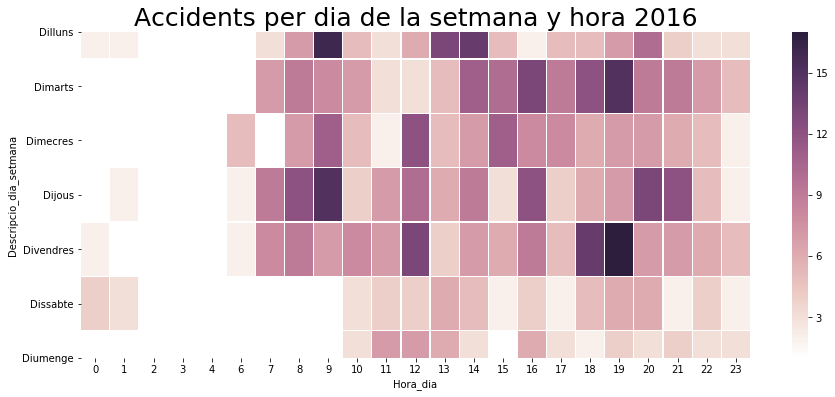

In [60]:
heat_data=bici18.groupby(['Descripcio_dia_setmana', 'Hora_dia'])['Any'].count().to_frame().unstack()
heat_data.columns = heat_data.columns.droplevel()
heat_data = heat_data.reindex(index = ['Dilluns', 'Dimarts', 'Dimecres', 'Dijous',
                                        'Divendres', 'Dissabte', 'Diumenge'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15,6))
sns.heatmap(heat_data,linewidths=.2,cmap=cmap)
plt.title('Accidents per dia de la setmana y hora 2016', fontsize=25)
plt.yticks(rotation=0)
